In [29]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings("ignore")

# Simple Linear Regression

* Newspaper Data example-

In [2]:
# sunday (y) ~ daily(x)

In [30]:
news = pd.read_csv("/NewspaperData.csv")
news.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [5]:
news.corr()  #correlation

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


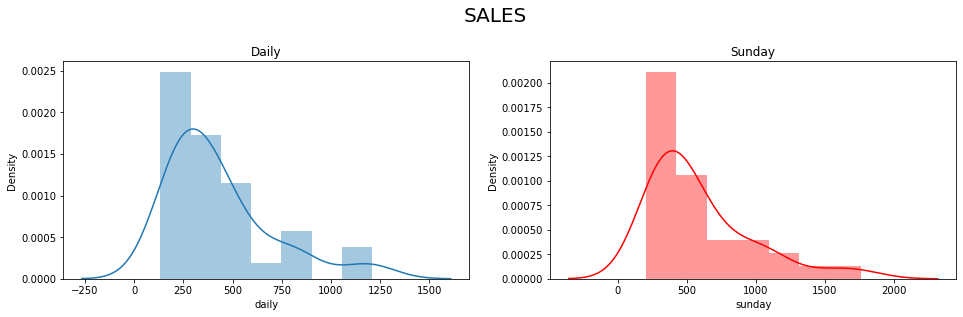

In [6]:
fig = plt.figure(figsize=(16,4))
plt.suptitle('SALES', size=20, y=1.07) 
plt.subplot(1,2,1)
sns.distplot(news['daily'])
plt.title('Daily')

plt.subplot(1,2,2)
sns.distplot(news['sunday'],color="red")
plt.title('Sunday');

In [7]:
# Fitting a Linear Regression Model
model = smf.ols("sunday~daily",data = news).fit() # ols-ordinary least square #x is regressed (~) over y

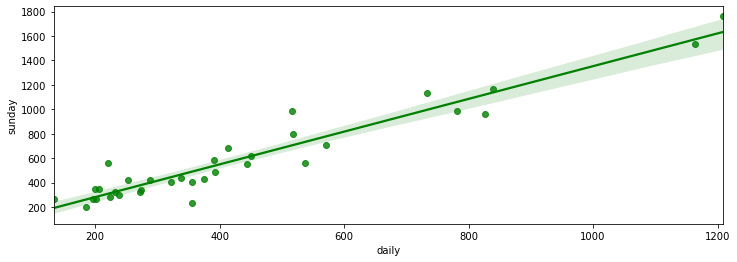

In [8]:
fig = plt.figure(figsize=(12,4))
sns.regplot(x="daily", y="sunday", data=news,color="green");

In [9]:
#Coefficients i.e ß0->intercept and ß1->daily
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [10]:
#t and p-Values (2-Tail) ->> h0:ß1=0 ; h1:ß1≠0
print(model.tvalues,'\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873294, 0.9154990548869335)

Predict for new data point

In [12]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [13]:
paper=pd.DataFrame(newdata,columns=['daily'])
paper

,daily
0,200
1,300


In [14]:
model.predict(paper)   # predicted y^ values based on previous model

0    281.778581
1    415.750057
dtype: float64

In [15]:
#to check the correct value
13.835630+(1.339715*200),  13.835630+(1.339715*300)  # y^= ß0+ß1x ->> y^= 13.835630 +(1.339715*x) 

(281.77862999999996, 415.75012999999996)

* Waist Circumference- Adipose Tissue Example-

In [16]:
# AT (y) ~ WC (x)

In [17]:
at = pd.read_csv("/WaistAdipose.csv")
at.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [18]:
at.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


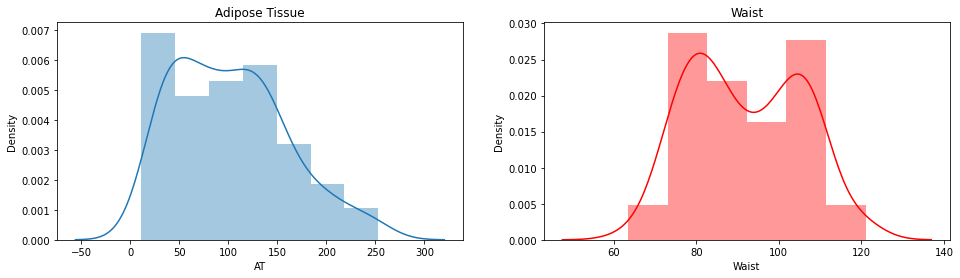

In [19]:
fig = plt.figure(figsize=(16,4)) 
plt.subplot(1,2,1)
sns.distplot(at['AT'])
plt.title('Adipose Tissue')

plt.subplot(1,2,2)
sns.distplot(at['Waist'],color="red")
plt.title('Waist');

In [20]:
model = smf.ols("AT~Waist",data = at).fit()

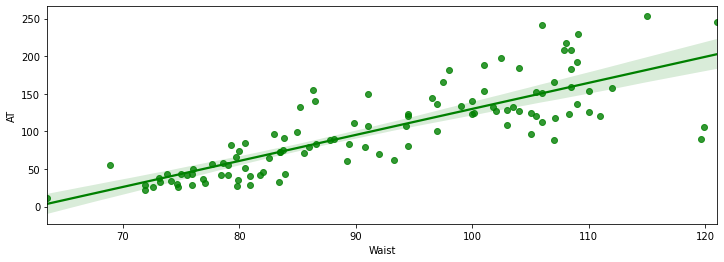

In [21]:
fig = plt.figure(figsize=(12,4))
sns.regplot(x="Waist", y="AT", data=at,color="green");

In [22]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [23]:
print(model.tvalues, '\n', model.pvalues)  

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)  # since r2 is <0.75 the model is weak

(0.6700368930528429, 0.6669531256981966)

In [25]:
newdata=pd.Series([98,85])

In [26]:
pred=pd.DataFrame(newdata,columns=['Waist'])
pred

,Waist
0,98
1,85


In [27]:
model.predict(pred)

0    122.986732
1     78.021560
dtype: float64

In [28]:
-215.981488+( 3.458859*98),  -215.981488+( 3.458859*85)

(122.986694, 78.02152699999999)